In [19]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
from skimage.transform import resize
import tensorflow as tf

In [28]:
dataset = io.loadmat('Data_hoda_full.mat')

In [31]:
X_train_orginal = np.squeeze(dataset['Data'][:1000])
y_train = np.squeeze(dataset['labels'][:1000])
X_test_original = np.squeeze(dataset['Data'][1000:1200])
y_test = np.squeeze(dataset['labels'][1000:1200])

In [32]:
X_train_5by5 = [resize(img, (5, 5)) for img in X_train_orginal]
X_test_5by_5 = [resize(img, (5, 5)) for img in X_test_original]

In [33]:
X_train = [x.reshape(25) for x in X_train_5by5]
X_test = [x.reshape(25) for x in X_test_5by_5]

In [38]:
def create_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_dim=25),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

In [39]:
MIN_LR = 1e-5

In [40]:


model = create_model()
opt = tf.keras.optimizers.SGD(lr=MIN_LR, momentum=0.9)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



C:\Users\Arianpc\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [45]:
from learningratefinder import LearningRateFinder

Epoch 1/64
32/32 [==============================] - 0s 2ms/step - loss: 2.3303 - accuracy: 0.0830
Epoch 2/64
32/32 [==============================] - 0s 2ms/step - loss: 2.3305 - accuracy: 0.0740
Epoch 3/64
32/32 [==============================] - 0s 2ms/step - loss: 2.3322 - accuracy: 0.0780
Epoch 4/64
32/32 [==============================] - 0s 1ms/step - loss: 2.3339 - accuracy: 0.0780
Epoch 5/64
32/32 [==============================] - 0s 2ms/step - loss: 2.3268 - accuracy: 0.0930
Epoch 6/64
32/32 [==============================] - 0s 2ms/step - loss: 2.3354 - accuracy: 0.0750
Epoch 7/64
32/32 [==============================] - 0s 2ms/step - loss: 2.3298 - accuracy: 0.0850
Epoch 8/64
32/32 [==============================] - 0s 1ms/step - loss: 2.3309 - accuracy: 0.0850
Epoch 9/64
32/32 [==============================] - 0s 2ms/step - loss: 2.3350 - accuracy: 0.0930
Epoch 10/64
32/32 [==============================] - 0s 2ms/step - loss: 2.3312 - accuracy: 0.0820
Epoch 11/64
32/32 [

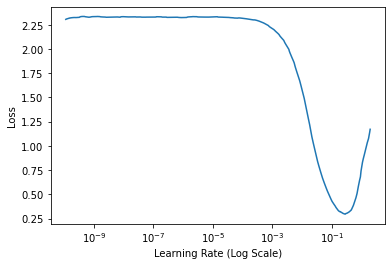

In [44]:
lrf = LearningRateFinder(model)
lrf.find((x_train, y_train),1e-10, 1e+1)
# plot the loss for the various learning rates and save the
# resulting plot to disk
lrf.plot_loss()